In [ ]:
import pandas as pd

file_path = "HARGA_RUMAH_JAKSEL.xlsx"

data = pd.read_excel(file_path, header=1)

data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

data = data.dropna()

print(data.head())


         HARGA    LT   LB  JKT  JKM  GRS    KOTA
0  28000000000  1100  700    5    6  ADA  JAKSEL
1  19000000000   824  800    4    4  ADA  JAKSEL
2   4700000000   500  400    4    3  ADA  JAKSEL
3   4900000000   251  300    5    4  ADA  JAKSEL
4  28000000000  1340  575    4    5  ADA  JAKSEL


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoder = LabelEncoder()
data['GRS'] = label_encoder.fit_transform(data['GRS'])
data['KOTA'] = label_encoder.fit_transform(data['KOTA'])

features_to_normalize = ['LT', 'LB', 'JKT', 'JKM', 'GRS', 'KOTA']
scaler = MinMaxScaler()
data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

print(data.head())


         HARGA        LT        LB       JKT       JKM  GRS  KOTA
0  28000000000  0.159279  0.066453  0.153846  0.192308  0.0   0.0
1  19000000000  0.118499  0.076491  0.115385  0.115385  0.0   0.0
2   4700000000  0.070626  0.036338  0.115385  0.076923  0.0   0.0
3   4900000000  0.033836  0.026300  0.153846  0.115385  0.0   0.0
4  28000000000  0.194740  0.053905  0.115385  0.153846  0.0   0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = data[['LT', 'LB', 'JKT', 'JKM', 'GRS', 'KOTA']]
y = data['HARGA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

print("Multiple Linear Regression:")
print(f"R-squared: {r2_linear:.2f}")
print(f"MSE: {mse_linear:.2f}")
print(f"RMSE: {rmse_linear:.2f}")


Multiple Linear Regression:
R-squared: 0.49
MSE: 76695956418891038720.00
RMSE: 8757622760.71


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

y_pred_poly = poly_model.predict(X_test_poly)

r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print("\nPolynomial Regression (Degree 2):")
print(f"R-squared: {r2_poly:.2f}")
print(f"MSE: {mse_poly:.2f}")
print(f"RMSE: {rmse_poly:.2f}")



Polynomial Regression (Degree 2):
R-squared: 0.41
MSE: 87461719914615767040.00
RMSE: 9352097086.46


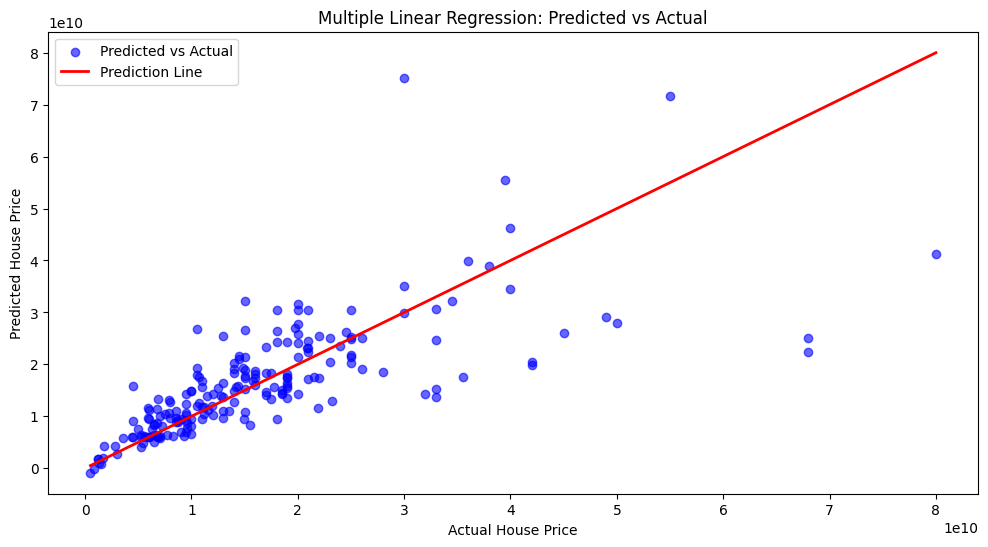

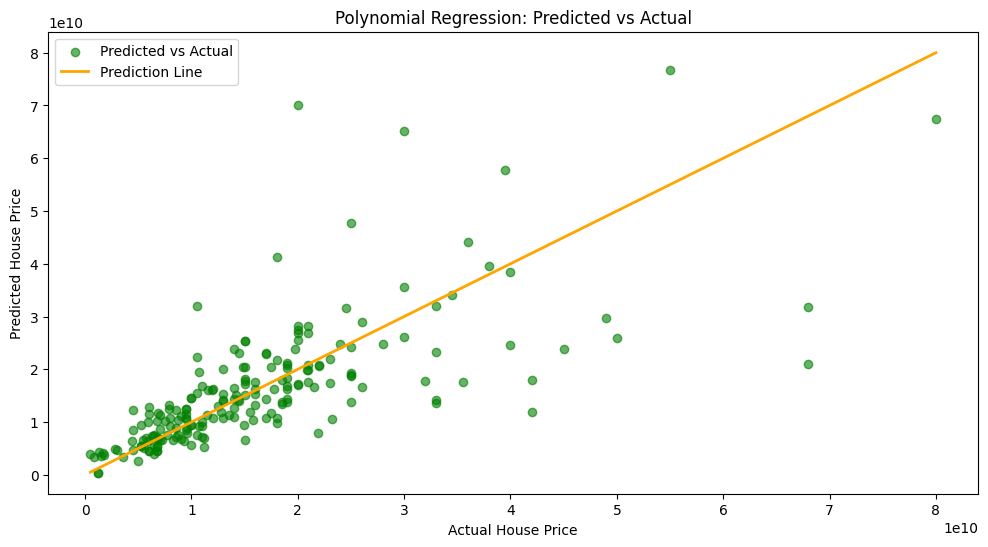

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Prediction Line')
plt.title('Multiple Linear Regression: Predicted vs Actual')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(y_test_poly, y_pred_poly, color='green', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], color='orange', linewidth=2, label='Prediction Line')
plt.title('Polynomial Regression: Predicted vs Actual')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.legend()
plt.show()


In [ ]:
print("Comparison of Models:")
print(f"Multiple Linear Regression -> R2: {r2_linear:.2f}, RMSE: {rmse_linear:.2f}")
print(f"Polynomial Regression (Degree 2) -> R2: {r2_poly:.2f}, RMSE: {rmse_poly:.2f}")

Comparison of Models:
Multiple Linear Regression -> R2: 0.49, RMSE: 8757622760.71
Polynomial Regression (Degree 2) -> R2: 0.41, RMSE: 9352097086.46
